In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv('prices-split-adjusted.csv')

In [3]:
df

,Unnamed: 0,date,symbol,open,close,low,high,volume
0,0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...,...
851259,851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [4]:
columns_to_drop=['Unnamed: 0','date','symbol']

In [5]:
df=df.drop(columns_to_drop,axis=1)

In [6]:
df

,open,close,low,high,volume
0,123.430000,125.839996,122.309998,126.250000,2163600.0
1,125.239998,119.980003,119.940002,125.540001,2386400.0
2,116.379997,114.949997,114.930000,119.739998,2489500.0
3,115.480003,116.620003,113.500000,117.440002,2006300.0
4,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...
851259,103.309998,103.199997,102.849998,103.930000,973800.0
851260,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,44.730000,45.450001,44.410000,45.590000,1380900.0


In [7]:
columns_order=['open','low','high','volume','close']


In [8]:
df=df[columns_order]

In [9]:
df

,open,low,high,volume,close
0,123.430000,122.309998,126.250000,2163600.0,125.839996
1,125.239998,119.940002,125.540001,2386400.0,119.980003
2,116.379997,114.930000,119.739998,2489500.0,114.949997
3,115.480003,113.500000,117.440002,2006300.0,116.620003
4,117.010002,114.089996,117.330002,1408600.0,114.970001
...,...,...,...,...,...
851259,103.309998,102.849998,103.930000,973800.0,103.199997
851260,43.070000,42.689999,43.310001,1938100.0,43.040001
851261,53.639999,53.270000,53.740002,1701200.0,53.529999
851262,44.730000,44.410000,45.590000,1380900.0,45.450001


In [65]:
x=df.iloc[:2000,:4]   # converting into numpy array

In [66]:
y=df.iloc[:2000,4:].values
y

array([[125.839996 ],
       [119.980003 ],
       [114.949997 ],
       ...,
       [ 33.740002 ],
       [ 36.689999 ],
       [ 30.9349995]])

In [67]:
u1=x.mean()
u2=y.mean()
std1=x.std()                  #normalisation
std2=y.std()

x=(x-u1)/std1
y=(y-u2)/std2

In [68]:
ones=np.ones((x.shape[0],1))
x=np.hstack((ones,x))

In [69]:
x


array([[ 1.        ,  1.73701355,  1.74326981,  1.7778098 , -0.25856086],
       [ 1.        ,  1.7797306 ,  1.68667038,  1.76117509, -0.24499876],
       [ 1.        ,  1.57062921,  1.56702323,  1.62528557, -0.23872294],
       ...,
       [ 1.        , -0.40238142, -0.39724305, -0.38845538, -0.35567476],
       [ 1.        , -0.31246308, -0.3088809 , -0.32004212, -0.34850413],
       [ 1.        , -0.45206069, -0.45061857, -0.45511154, -0.24176041]])

In [70]:
from sklearn.model_selection import train_test_split


In [71]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [72]:
def hypothesis(x,theta):
    y=0
    for i in range(len(x)):
        y+=theta[i]*x[i]
    return y

def cost(x,y,theta):
    m = x.shape[0]
    total_error=0
    for i in range (m):
        h=hypothesis(x[i],theta)
        total_error+=(h-y[i])**2
    return total_error/m

def gradient(X,Y,theta):
    m,n=X.shape
    grad=np.zeros((n,))
    for j in range(n):
        for i in range(m):
            
            h=hypothesis(X[i],theta)

            grad[j]+=(h-Y[i])*X[i][j]
    return grad/m
def gradient_descent(x,y,learning_rate=0.1,max_iteration=100):
    m,n=x.shape
    cost_epoch=[]
    theta=np.zeros((n,))
    for i in range(max_iteration):
        grad=gradient(x,y,theta)
        curr_cost=cost(x,y,theta)
        cost_epoch.append(curr_cost)
        for j in range(n):
            theta[j]=theta[j]-learning_rate*grad[j]
    return theta,cost_epoch

In [73]:
theta,cost_epoch=gradient_descent(X_train,y_train)

In [74]:
theta

array([-5.17105198e-05,  3.32310033e-01,  3.33462978e-01,  3.33927418e-01,
       -2.55492236e-04])

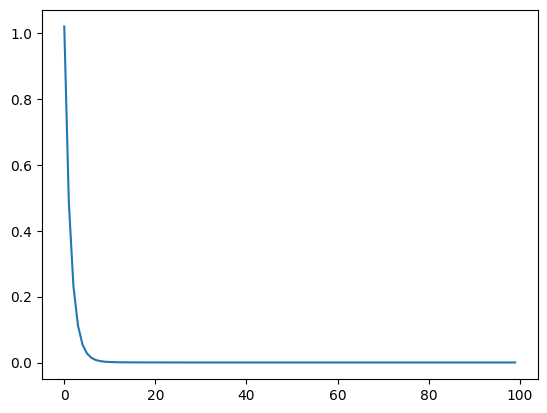

In [75]:
plt.plot(cost_epoch)

In [76]:
y_p=[]
for i in range(X_test.shape[0]):
    pred=hypothesis(X_test[i],theta)
    y_p.append(pred)

In [77]:
y_p=np.array(y_p)

In [78]:
for i in  range(y_test.shape[0]):
    print(y_p[i],y_test[i])

0.3338556981294792 [0.35514459]
0.22699970091211025 [0.22427747]
-0.6851473842973386 [-0.68729574]
-0.34299986760924606 [-0.35054376]
0.22533048182593088 [0.23823978]
-0.19403672092476373 [-0.19565673]
1.9226957925475174 [1.91490036]
-0.4184787650730213 [-0.42106525]
1.5197616042076916 [1.50218389]
0.6243283054584524 [0.62681791]
1.6451581829631052 [1.62784461]
-0.5982495097710507 [-0.60375851]
-0.4479894430211368 [-0.4482799]
-0.6007628108910057 [-0.59003285]
-0.41284532101480165 [-0.42272178]
-0.971811984361803 [-0.97535711]
-0.7722893523573432 [-0.77745911]
1.7893029305819932 [1.77788021]
0.471134421974401 [0.47536233]
-0.41566348785575297 [-0.41301915]
-0.41177710747141316 [-0.40793121]
-0.3012828788070717 [-0.29905183]
-0.2841048258492676 [-0.27623589]
0.05741421202555029 [0.04584386]
-0.7670664121190416 [-0.76775649]
1.8056980689091195 [1.81456093]
-0.34795927992954057 [-0.35551337]
-0.6124638730040057 [-0.61085796]
-0.8485611987974929 [-0.84679736]
1.4285926428296938 [1.45083085

In [79]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_p)
print(r2)

0.9998642091536666
